In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)

In [7]:
feat = pd.concat([feat,z_noise],axis=1)

In [8]:
feat.columns=['X1','X2','X3']

In [9]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


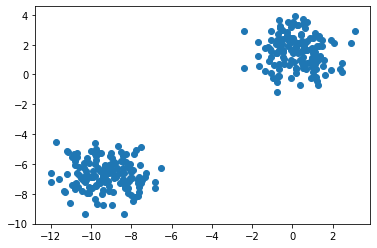

In [10]:
plt.scatter(feat['X1'],feat['X2'])

In [11]:
from mpl_toolkits.mplot3d import Axes3D

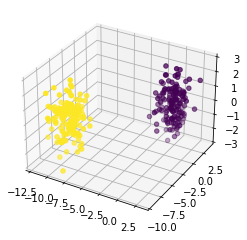

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [15]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [16]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

C:\Users\RW565TZ\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1863
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1658
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1229
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1114


In [20]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 893us/step


In [21]:
encoded_2dim

array([[1.20045543e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.01208568e+00, 0.00000000e+00],
       [9.62609172e-01, 0.00000000e+00],
       [6.18986964e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [9.29560423e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [6.91107392e-01, 0.00000000e+00],
       [6.83221400e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [6.58898234e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [9.45032239e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [7.71212578e-03, 0.00000000e+00],
       [1.46472454e-01, 0.00000000e+00],
       [2.23506093e-02, 0.00000000e+00],
       [8.23449969e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [7.10513473e-01, 0.00000000e+00],
       [8.926836

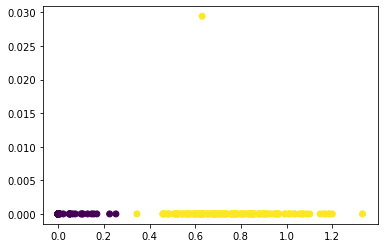

In [23]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)